#**Market Magician**

This is a basic regression model on any stock you enter. As we continue, we will be implementing the LSTM Model on the same datasets and continueing to refine our predictions in a measurable way as well as be consistent in our prediction's outcome.

In [ ]:
#installing the packages we intend to use
!pip install yfinance --upgrade --no-cache-dir
!pip install mpl_finance --upgrade --no-cache-dir
!pip install pandas_datareader --upgrade --no-cache-dir
!pip install scikit-learn --upgrade --no-cache-dir

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from mpl_finance import candlestick_ohlc
import math
import random
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, AdditiveAttention, Permute, Reshape, Multiply


print(tf.__version__)

2.17.0


In [ ]:
#Choose which stock you wish to search from Y!Finance
stock =  input("Enter a stock ticker Symbol: ")
print(stock)

Enter a stock ticker Symbol: SPY
SPY


In [ ]:
#Choose the start year, month, and day to begin collecting data from.
#This directly affects the amount of data the AI can potentially train on
start_year = 2010
start_month = 1
start_day = 1
start = dt.date(start_year, start_month, start_day)

now = dt.datetime.now()
#Creates and prints a dataframe of the the stock's historical data
df = yf.download(stock, start, now)

#preprocess data
df.isnull().sum()
df.ffill(inplace=True)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,86.316010,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,86.544464,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,86.605392,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,86.970993,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,87.260406,126402800


In [ ]:
'''
This is a way to randomly sample 60 day periods within within the dataframe.
The idea is to have the algorithm input the history of the previous 30 days
and try and predict the next 30 days.
'''
# Calculate the maximum starting index for 60 consecutive data points
max_start_index = len(df) - 60

# Generate a random starting index
random_start_index = random.randint(0, max_start_index)

# Select the 60 consecutive data points
random_data_points = df.iloc[random_start_index : random_start_index + 60]

# Print the selected data points
print(random_data_points)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-06-11  534.070007  537.010010  532.049988  536.950012  533.586670   
2024-06-12  541.630005  544.119995  540.299988  541.359985  537.969055   
2024-06-13  543.150024  543.330017  539.590027  542.450012  539.052185   
2024-06-14  540.880005  542.809998  539.849976  542.780029  539.380188   
2024-06-17  542.080017  548.530029  541.609985  547.099976  543.673035   
2024-06-18  547.159973  548.619995  546.729980  548.489990  545.054382   
2024-06-20  549.440002  550.119995  545.179993  547.000000  543.573669   
2024-06-21  544.400024  545.650024  543.020020  544.510010  542.844971   
2024-06-24  544.330017  546.950012  542.619995  542.739990  541.080322   
2024-06-25  543.989990  545.200012  542.440002  544.830017  543.164001   
2024-06-26  543.690002  546.239990  543.030029  545.510010  543.841919   
2024-06-27  545.369995  546.960022  54

In [ ]:
'''
This Strategy involves Moving Averages, more specifically the Exponential Moving Average.
The idea behind the strategy is that whenever a faster moving average's(75) price point eclipses
that of a slower average's (150) price point, then it is a buy because there the faster moving average
more closely follows the stock price, while the slower moving average is a trend indicator.
'''
emasUsed = [75,150]

#Iterates through the dataframe and adds a new column for Each EMA used and populates those columns
for x in emasUsed:
    ema = x
    df["Ema_"+str(ema)]=round(df.iloc[:,4].ewm(span=ema, adjust=False).mean(),2)


In [ ]:
#backtest the trading strategy and calculate % gain or loss

#simulate opening a position
pos = 0
num = 0

percentchange = []

for i in df.index:
  #checks the Moving Average at the ith index
  ema75 = df["Ema_75"][i]
  ema150 = df["Ema_150"][i]
  close = df["Adj Close"][i]

  #If the 75EMA is greater than the 150 EMA, Buy
  if (ema75 > ema150):
    print("75 crossed above")
    if(pos==0):
      bp = close
      pos = 1
      print("Buying now at "+str(bp))
  #If the 75 is less the the 150, it is considered a Sell
  elif (ema75 < ema150):
    print("75 crossed below")
    if(pos==1):
      sp = close
      pos = 0
      print("Selling now at "+str(sp))
      pc = (sp/bp - 1)*100
      percentchange.append(pc)
  if(num == df["Adj Close"].count()-1 and pos ==1):
    sp = close
    pos = 0
    pc = (sp/bp - 1)*100
    percentchange.append(pc)
  num+=1

print(percentchange)

75 crossed above
Buying now at 86.60539245605469
75 crossed above
75 crossed above
75 crossed above
75 crossed above
75 crossed above
75 crossed above
75 crossed above
75 crossed above
75 crossed above
75 crossed above
75 crossed above
75 crossed below
Selling now at 83.60456085205078
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed below
75 crossed above
Buying now at 89.35578918457031
75

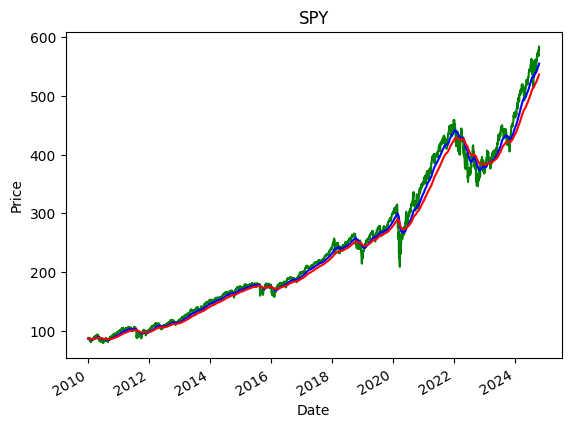

In [ ]:
df["Adj Close"].plot(label="Adj Close", color = 'green')
df["Ema_75"].plot(label="Ema_75", color = 'blue')
df["Ema_150"].plot(label="Ema_150", color = 'red')
plt.title(stock)
plt.xlabel("Date")
plt.ylabel("Price")

plt.show()

# Training the Regression Model

In [ ]:
#splitting the dataframe into training set and test set
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [ ]:
#Turns feature into labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()
#define labels
train_labels = train_features.pop('Adj Close')
test_labels = test_features.pop('Adj Close')

In [ ]:
#Creates a normalization function
normalizer = tf.keras.layers.Normalization(axis=-1)

open_normalizer = tf.keras.layers.Normalization(axis=-1)
high_normalizer = tf.keras.layers.Normalization(axis=-1)
low_normalizer = tf.keras.layers.Normalization(axis=-1)
volume_normalizer = tf.keras.layers.Normalization(axis=-1)

#fits the state of the preprocessing layer
normalizer.adapt(np.array(train_features))

#calculates the mean and variance and stores them in the layer
print(normalizer.mean.numpy())

[[2.6864655e+02 2.7009793e+02 2.6707855e+02 2.6868430e+02 1.1266171e+08
  2.4094942e+02 2.3664667e+02]]


In [ ]:
# Define input layers for each feature
input_open = keras.Input(shape=(1,), name='input_layer_8')
input_high = keras.Input(shape=(1,), name='input_layer_9')
input_low = keras.Input(shape=(1,), name='input_layer_10')
input_volume = keras.Input(shape=(1,), name='input_layer_11')

# Normalize each input feature
open_norm = open_normalizer(input_open)
high_norm = high_normalizer(input_high)
low_norm = low_normalizer(input_low)
volume_norm = volume_normalizer(input_volume)

# Concatenate normalized features
all_features = layers.concatenate([open_norm, high_norm, low_norm, volume_norm])

# Create the Dense layer
output = layers.Dense(units=1)(all_features)

# Create the model
model = keras.Model(inputs=[input_open, input_high, input_low, input_volume], outputs=output)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_9             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_10            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_11            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_2           │ (None, 1)              │              3 │ input_layer_8[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_3           │ (None, 1)              │              3 │ input_layer_9[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_4           │ (None, 1)              │              3 │ input_layer_10[0][0]   │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_5           │ (None, 1)              │              3 │ input_layer_11[0][0]   │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 4)              │              0 │ normalization_2[0][0], │
│                           │                        │                │ normalization_3[0][0], │
│                           │                        │                │ normalization_4[0][0], │
│                           │                        │                │ normalization_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1)              │              5 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 17 (84.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 12 (64.00 B)

In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=tf.keras.losses.MeanSquaredError)

In [ ]:
#Fitting the model to execute training for 100 epochs
%%time
history = model.fit(
    {
        'input_layer_8': train_features['Open'],
        'input_layer_9': train_features['High'],
        'input_layer_10': train_features['Low'],
        'input_layer_11': train_features['Volume']

    },
    train_labels,
    epochs=100,
    #Surpress logging
    verbose=0,
    #calculate validation results on 20% of training data
    validation_split = 0.2)

CPU times: user 19.7 s, sys: 958 ms, total: 20.6 s
Wall time: 23.5 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,1.957452e+05,1.755799e+05,95
96,2.376476e+05,1.818506e+05,96
97,8.173282e+05,4.508087e+05,97
98,1.435842e+06,7.673701e+05,98
99,5.038660e+06,2.696836e+07,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Adj Close]')
  plt.legend()
  plt.grid(True)

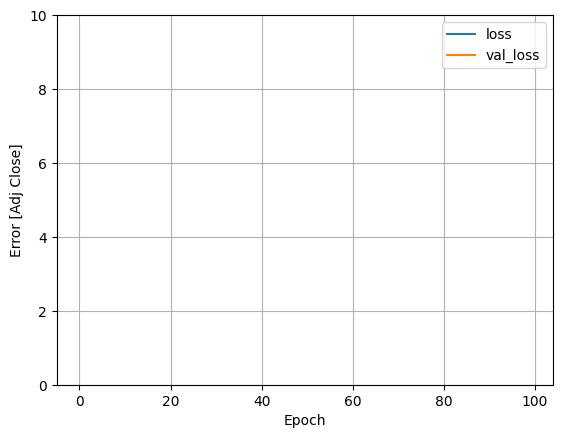

In [ ]:
plot_loss(history)

In [ ]:
#Collet te results for the test set

test_results = {}

test_results['model'] = model.evaluate(
    {
        'input_layer_8': test_features['Open'],
        'input_layer_9': test_features['High'],
        'input_layer_10': test_features['Low'],
        'input_layer_11': test_features['Volume']
    },
    test_labels, verbose=0)

In [ ]:
x = {
    'input_layer_8': test_features['Open'],
    'input_layer_9': test_features['High'],
    'input_layer_10': test_features['Low'],
    'input_layer_11': test_features['Volume']
}
y = model.predict(x)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
def plot_open(x, y):
  plt.figure(figsize=(10, 6))
  plt.scatter(train_features['Open'], train_labels, label='Data')
  # Assuming x is a dictionary containing input data, extract 'Open' values:
  plt.plot(x['input_layer_8'], y, color='k', label='Predictions')
  plt.xlabel('Open')
  plt.ylabel('Adj Close')
  plt.legend()

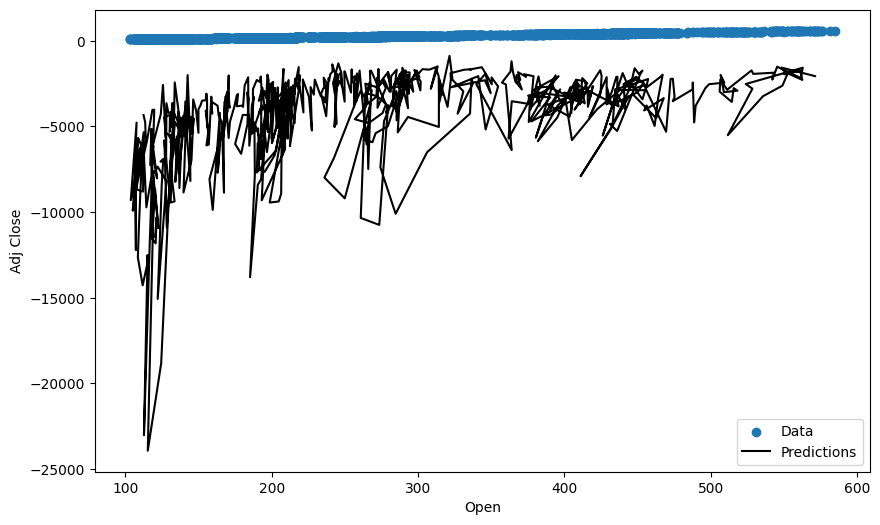

In [ ]:
plot_open(x, y)

# Training the LSTM Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Looks at only Close for predictions
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [ ]:
#Chooses sequence length. For now we will use 90 days
X = []
y = []

for i in range(90, len(df_scaled)):
    X.append(df_scaled[i-90:i, 0])
    y.append(df_scaled[i, 0])


In [ ]:
#splittiing the data into training and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#creating the model
model = Sequential()

# Adding LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))  # Only the last time step

# Adding a Dense layer to match the output shape with y_train
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0077 - val_loss: 0.0014
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.2830e-05 - val_loss: 0.0017
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.0901e-04 - val_loss: 0.0011
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.0287e-04 - val_loss: 0.0011
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.1963e-05 - val_loss: 7.0558e-04
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 9.1439e-05 - val_loss: 9.5502e-04
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.2356e-05 - val_loss: 9.4340e-04
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.3813e-05 - val_loss: 6.2467e-04
Epoch 9/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.9732e-05 - val_loss: 6.4246e-04
Epoch 10/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.7065e-05 - val_loss: 6.8345e-04
Epoch 11/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.5044e-05 - val_l

In [ ]:
# Convert X_test and y_test to Numpy arrays if they are not already
X_test = np.array(X_test)
y_test = np.array(y_test)

# Ensure X_test is reshaped similarly to how X_train was reshaped
# This depends on how you preprocessed the training data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Now evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6038e-04
Test Loss:  0.00019322407024446875


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Making predictions
y_pred = model.predict(X_test)

# Calculating MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Mean Absolute Error:  0.010946754350368106
Root Mean Square Error:  0.0139005062992761


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Fetching the latest 90 days of a stock's data
data = yf.download(stock, period='3mo', interval='1d')

# Selecting the 'Close' price and converting to numpy array
if data.empty:
  print(f"Error: Could not fetch data for {stock}. Check the stock symbol.")
else:
  closing_prices = data['Close'].values
  # Scaling the data
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(closing_prices.reshape(-1,1))

  # Since we need the last 60 days to predict the next day, we reshape the data accordingly
  X_latest = np.array([scaled_data[-60:].reshape(60)])

  # Reshaping the data for the model (adding batch dimension)
  X_latest = np.reshape(X_latest, (X_latest.shape[0], X_latest.shape[1], 1))

  # Making predictions for the next 4 candles
  predicted_stock_price = model.predict(X_latest)
  predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

print("Predicted Stock Prices for the next day: ", predicted_stock_price)

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Stock Prices for the next day:  [[584.24066]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

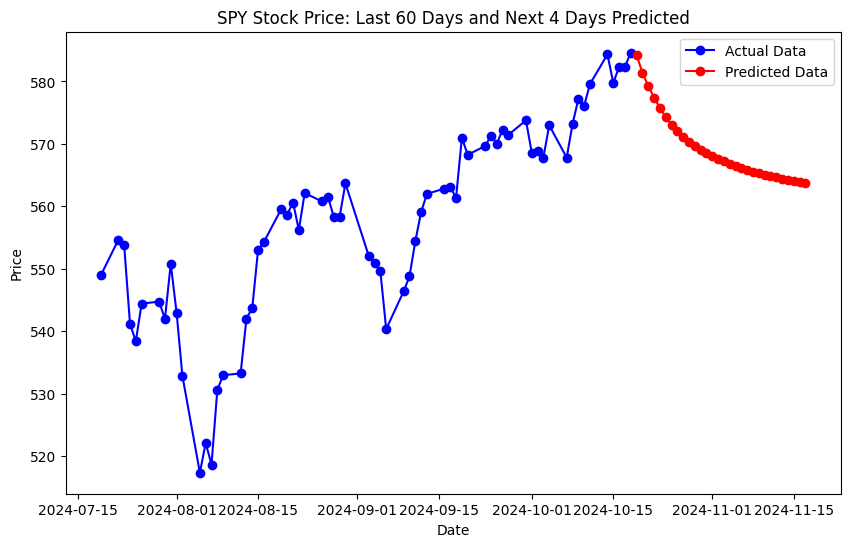

In [ ]:
scaler_for_prediction = MinMaxScaler(feature_range=(0, 1))
scaler_for_prediction.fit(closing_prices.reshape(-1, 1))  # Fit to original closing prices


# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(30):  # Predicting 4 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler_for_prediction.inverse_transform(next_prediction)[0, 0])


#Creating a list of dates for prediction
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=30)

# Plotting the actual data
plt.figure(figsize=(10,6))
plt.plot(data.index[-90:], data['Close'][-90:], linestyle='-', marker='o', color='blue', label='Actual Data')

# Plotting the predicted data
plt.plot(prediction_dates, predicted_prices, linestyle='-', marker='o', color='red', label='Predicted Data')

plt.title("SPY Stock Price: Last 60 Days and Next 4 Days Predicted")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()